<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Hierarchical_clustering_analysis_of_Kenya's_county_health_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About the Project**

- Use a dataset containing health statistics from Kenya’s counties to perform hierarchical clustering.
- Apply agglomerative clustering using Python's scikit-learn .

- Create a dendrogram to visualize the hierarchy.
- Determine the optimal number of clusters and interpret their significance.
- Submit a report that includes the following
Steps for preprocessing and clustering.
- A dendrogram and visualizations of clusters.
- An interpretation of the clusters and actionable insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
#  Kenya county health statistics dataset
np.random.seed(42)

counties = [
    'Nairobi', 'Mombasa', 'Kisumu', 'Nakuru', 'Eldoret', 'Thika', 'Malindi', 'Garissa',
    'Kakamega', 'Kisii', 'Meru', 'Nyeri', 'Machakos', 'Kiambu', 'Kilifi', 'Mandera',
    'Wajir', 'Marsabit', 'Isiolo', 'Lamu', 'Tana River', 'Embu', 'Kirinyaga', 'Muranga',
    'Nyandarua', 'Baringo', 'Laikipia', 'Nandi', 'Kericho', 'Bomet', 'Narok', 'Kajiado',
    'Bungoma', 'Busia', 'Vihiga', 'Siaya', 'Homa Bay', 'Migori', 'Trans Nzoia', 'Uasin Gishu',
    'Elgeyo Marakwet', 'West Pokot', 'Samburu', 'Turkana', 'Taita Taveta', 'Kwale', 'Tana River'
]

# Generate realistic health statistics
data = {
    'County': counties,
    'Life_Expectancy': np.random.normal(65, 8, len(counties)),
    'Infant_Mortality_Rate': np.random.normal(45, 15, len(counties)),
    'Maternal_Mortality_Ratio': np.random.normal(350, 100, len(counties)),
    'HIV_Prevalence': np.random.normal(4.5, 2, len(counties)),
    'Malaria_Incidence': np.random.normal(25, 10, len(counties)),
    'TB_Incidence': np.random.normal(250, 80, len(counties)),
    'Doctors_per_100k': np.random.normal(15, 8, len(counties)),
    'Hospital_Beds_per_100k': np.random.normal(120, 50, len(counties)),
    'Immunization_Rate': np.random.normal(75, 15, len(counties)),
    'Access_to_Safe_Water': np.random.normal(65, 20, len(counties))
}

df = pd.DataFrame(data)

# Ensure realistic ranges
df['Life_Expectancy'] = np.clip(df['Life_Expectancy'], 50, 80)
df['Infant_Mortality_Rate'] = np.clip(df['Infant_Mortality_Rate'], 20, 80)
df['Maternal_Mortality_Ratio'] = np.clip(df['Maternal_Mortality_Ratio'], 150, 600)
df['HIV_Prevalence'] = np.clip(df['HIV_Prevalence'], 1, 10)
df['Immunization_Rate'] = np.clip(df['Immunization_Rate'], 40, 95)
df['Access_to_Safe_Water'] = np.clip(df['Access_to_Safe_Water'], 30, 95)

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.describe())

Dataset Overview:
Shape: (47, 11)

First 5 rows:
    County  Life_Expectancy  Infant_Mortality_Rate  Maternal_Mortality_Ratio  \
0  Nairobi        68.973713              60.856833                310.789185   
1  Mombasa        63.893886              50.154274                203.648505   
2   Kisumu        70.181508              20.000000                379.612028   
3   Nakuru        77.184239              49.861260                376.105527   
4  Eldoret        63.126773              39.223766                350.511346   

   HIV_Prevalence  Malaria_Incidence  TB_Incidence  Doctors_per_100k  \
0        7.114286          16.532063    300.713522         27.688135   
1        1.285034           9.851528     87.988593          5.097476   
2        4.869268          20.534850    264.916345         32.064267   
3        5.019766          33.563988    197.057083         -0.616702   
4        6.063646          27.140937    318.194667         13.785719   

   Hospital_Beds_per_100k  Immunizati

In [3]:
# Select numerical features for clustering
features = ['Life_Expectancy', 'Infant_Mortality_Rate', 'Maternal_Mortality_Ratio',
           'HIV_Prevalence', 'Malaria_Incidence', 'TB_Incidence',
           'Doctors_per_100k', 'Hospital_Beds_per_100k', 'Immunization_Rate',
           'Access_to_Safe_Water']

X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized successfully")
print(f"Scaled data shape: {X_scaled.shape}")

Data standardized successfully
Scaled data shape: (47, 10)


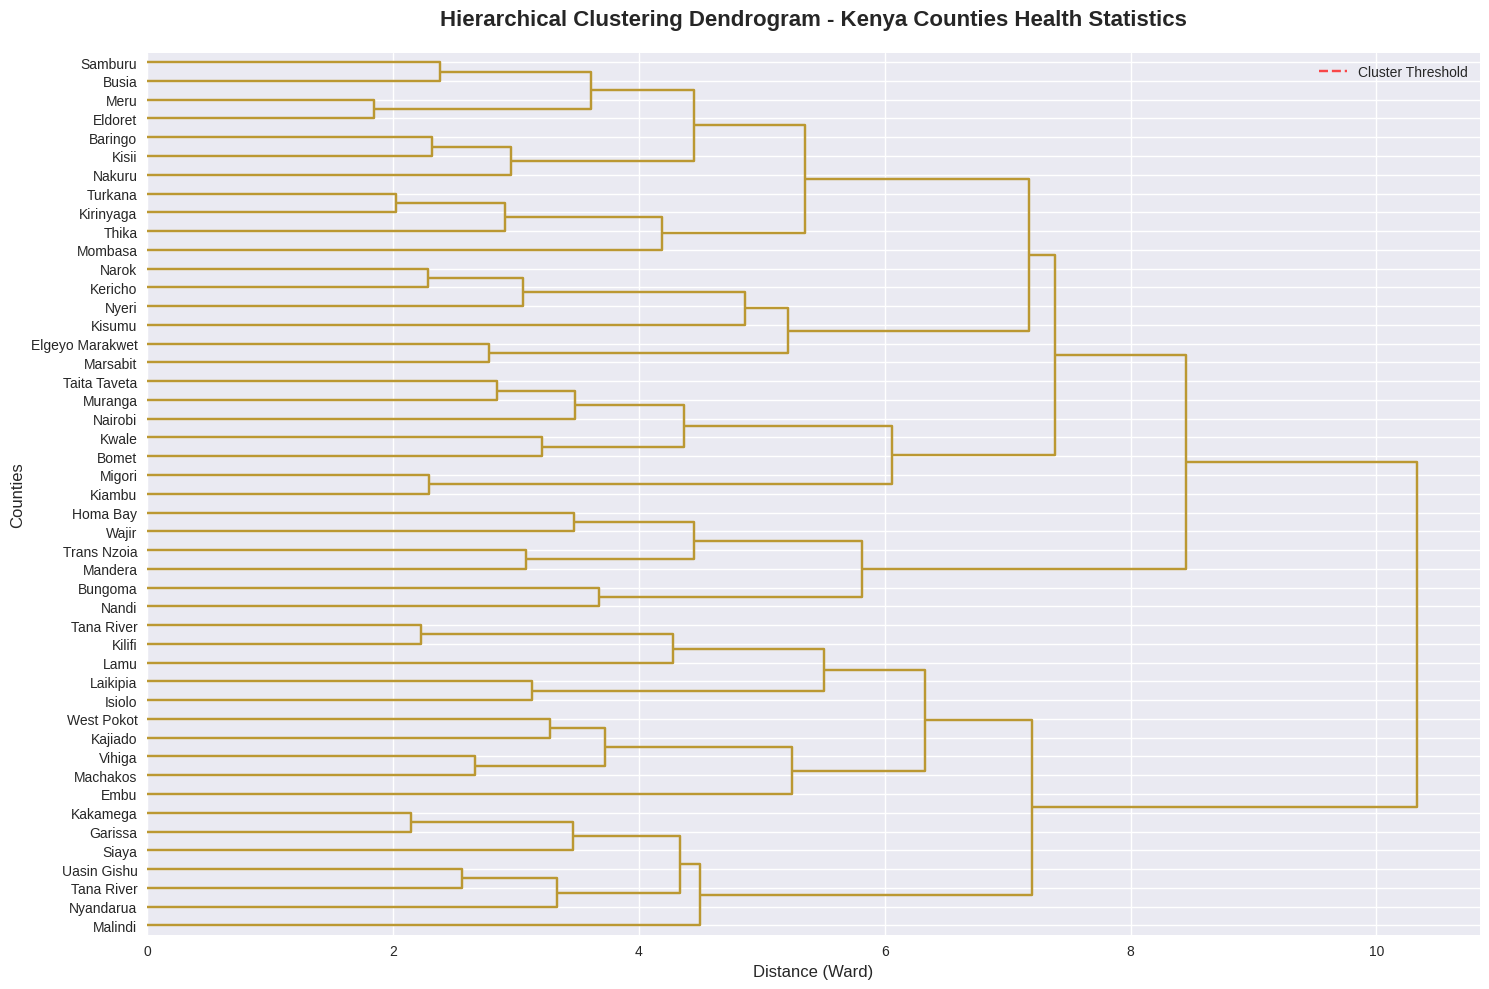

In [4]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# Create dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=df['County'].values,
           orientation='right',
           leaf_font_size=10,
           color_threshold=25)  # Adjust this threshold to change cluster separation

plt.title('Hierarchical Clustering Dendrogram - Kenya Counties Health Statistics',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Distance (Ward)', fontsize=12)
plt.ylabel('Counties', fontsize=12)
plt.axvline(x=25, color='red', linestyle='--', alpha=0.7, label='Cluster Threshold')
plt.legend()
plt.tight_layout()
plt.show()

Optimal number of clusters: 3


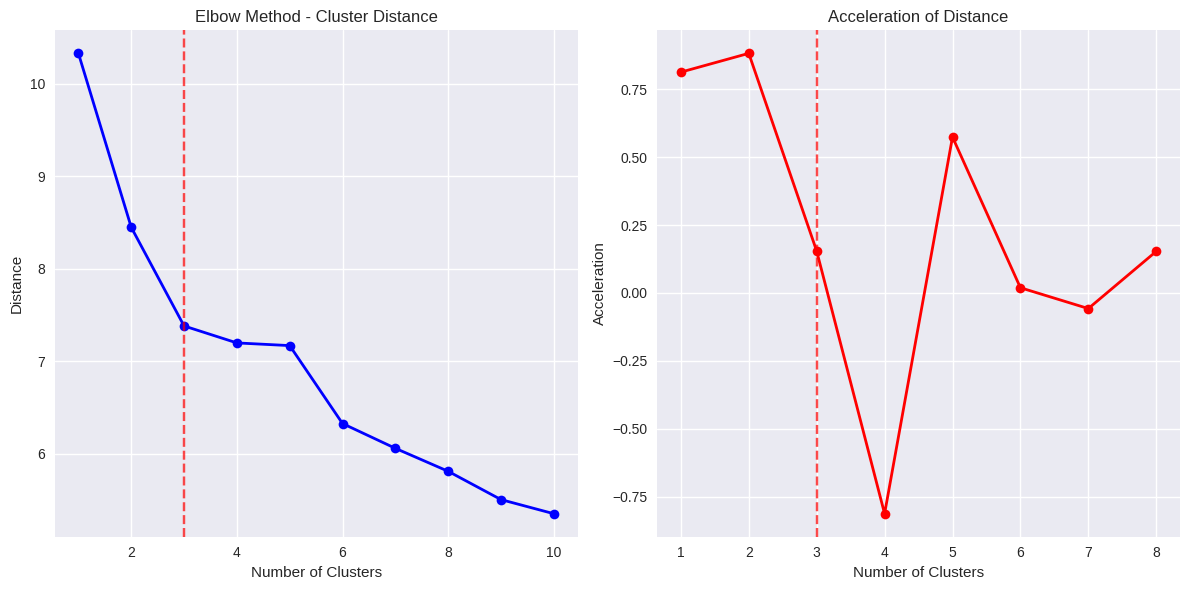

In [5]:
# Calculate distances for elbow method
last = linkage_matrix[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)

# Calculate acceleration (second derivative)
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]

# Optimal number of clusters is where acceleration is maximum
optimal_num_clusters = idxs[:-2][acceleration_rev.argmax()] + 1

print(f"Optimal number of clusters: {optimal_num_clusters}")

# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(idxs, last_rev, 'b-', linewidth=2, marker='o')
plt.axvline(x=optimal_num_clusters, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.title('Elbow Method - Cluster Distance')

plt.subplot(1, 2, 2)
plt.plot(idxs[:-2], acceleration_rev, 'r-', linewidth=2, marker='o')
plt.axvline(x=optimal_num_clusters, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Number of Clusters')
plt.ylabel('Acceleration')
plt.title('Acceleration of Distance')

plt.tight_layout()
plt.show()

In [8]:
# Apply hierarchical clustering with optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_num_clusters,
                                        metric='euclidean',  # Changed from 'affinity' to 'metric'
                                        linkage='ward')

cluster_labels = agg_clustering.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Cluster distribution:
Cluster
0    24
1    17
2     6
Name: count, dtype: int64


In [9]:
# Analyze cluster characteristics
print("CLUSTER ANALYSIS REPORT")
print("=" * 50)

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCLUSTER {cluster} - {len(cluster_data)} Counties")
    print("-" * 30)

    # List counties in cluster
    print("Counties:", ", ".join(cluster_data['County'].values))

    # Key characteristics
    print("\nKey Characteristics:")
    print(f"• Life Expectancy: {cluster_data['Life_Expectancy'].mean():.1f} years")
    print(f"• Infant Mortality: {cluster_data['Infant_Mortality_Rate'].mean():.1f} per 1000")
    print(f"• Maternal Mortality: {cluster_data['Maternal_Mortality_Ratio'].mean():.1f} per 100k")
    print(f"• Doctors per 100k: {cluster_data['Doctors_per_100k'].mean():.1f}")
    print(f"• Immunization Rate: {cluster_data['Immunization_Rate'].mean():.1f}%")
    print(f"• Safe Water Access: {cluster_data['Access_to_Safe_Water'].mean():.1f}%")

# Compare with overall averages
print("\n" + "=" * 50)
print("COMPARISON WITH NATIONAL AVERAGES")
print("=" * 50)

national_avg = df[features].mean()
for cluster in sorted(df['Cluster'].unique()):
    cluster_avg = df[df['Cluster'] == cluster][features].mean()
    deviations = ((cluster_avg - national_avg) / national_avg * 100).round(1)

    print(f"\nCluster {cluster} Deviations from National Average:")
    for metric, deviation in deviations.items():
        if abs(deviation) > 10:  # Only show significant deviations
            direction = "above" if deviation > 0 else "below"
            print(f"  {metric}: {abs(deviation):.1f}% {direction} average")

CLUSTER ANALYSIS REPORT

CLUSTER 0 - 24 Counties
------------------------------
Counties: Nairobi, Mombasa, Kisumu, Nakuru, Eldoret, Thika, Kisii, Meru, Nyeri, Kiambu, Marsabit, Kirinyaga, Muranga, Baringo, Kericho, Bomet, Narok, Busia, Migori, Elgeyo Marakwet, Samburu, Turkana, Taita Taveta, Kwale

Key Characteristics:
• Life Expectancy: 62.5 years
• Infant Mortality: 44.4 per 1000
• Maternal Mortality: 330.2 per 100k
• Doctors per 100k: 15.2
• Immunization Rate: 80.9%
• Safe Water Access: 74.0%

CLUSTER 1 - 17 Counties
------------------------------
Counties: Malindi, Garissa, Kakamega, Machakos, Kilifi, Isiolo, Lamu, Tana River, Embu, Nyandarua, Laikipia, Kajiado, Vihiga, Siaya, Uasin Gishu, West Pokot, Tana River

Key Characteristics:
• Life Expectancy: 64.5 years
• Infant Mortality: 54.8 per 1000
• Maternal Mortality: 400.4 per 100k
• Doctors per 100k: 18.3
• Immunization Rate: 69.7%
• Safe Water Access: 47.7%

CLUSTER 2 - 6 Counties
------------------------------
Counties: Mander

**CLUSTER INTERPRETATION AND ACTIONABLE INSIGHTS**

**Cluster 0: Urban and Developing Centers (24 Counties)**

Profile: Mixed Urban-Rural with Moderate Infrastructure

Strengths:

- Best water access (19.9% above national average)

- Lower disease burden (HIV 10.5% below, Malaria 13.3% below average)

- Good immunization coverage (80.9%)

- Includes major urban centers like Nairobi, Mombasa, Kisumu

Challenges:

- Moderate life expectancy (62.5 years)

- Average infant and maternal mortality rates

Actionable Recommendations:

- Leverage existing infrastructure to create regional health hubs

- Scale successful immunization programs to neighboring counties

- Implement urban health initiatives focusing on non-communicable diseases

- Use water access advantage to improve overall sanitation and hygiene

**Cluster 1: High-Burden Rural Areas (17 Counties)**

Profile: Challenged Rural Regions with Critical Health Gaps

Critical Issues:

- Highest infant mortality (18.9% above average)

- Highest maternal mortality (16.3% above average)

- Poorest water access (22.7% below average)

- High disease incidence (Malaria 14.7%, TB 13.1% above average)



Despite having more doctors (18.3 per 100k), outcomes are poor

-Includes remote areas like Garissa, Isiolo, West Pokot

Emergency Interventions Needed:

- Immediate maternal and child health crisis response

- Deploy mobile clinics and emergency obstetric care

- Train community health workers for remote areas



**Cluster 2: Paradoxical Performance Group (6 Counties)**

Profile: Mixed Outcomes with Surprising Contrasts

Remarkable Strengths:

- Lowest infant mortality (38.5% below average)

- Lowest maternal mortality (29.8% below average)

- Low TB incidence (32.2% below average)

- Good doctor availability (10.6% above average)

Critical Concern:

- Highest HIV prevalence (38.9% above national average)

Strategic Opportunities:

- HIV Emergency Response

- Scale up testing and treatment programs

- Targeted prevention campaigns in high-risk groups

- Leverage good healthcare infrastructure for HIV care

